In [55]:
# Created by Osama Ashhad Azmi in March '18

"""
To Do:
# Use np functions to append bias, delete delta
# Fix the accuracy function for one hot compatibility
# Implement the cost function
# If possible clean the train function
"""

import numpy as np
import random


class NeuralNetwork:

    def __init__(self, layerN):
        self.m = None
        self.layerN = layerN
        self.w = [2 * np.random.random((layerN[i] + 1, layerN[i + 1])) - 1 for i in range(len(layerN) - 1)]
        self.layer = [None for _ in range(len(layerN))]

    # function to implement forward propagation
    def feedForward(self, X):
        self.layer[0] = self.addBias(X)
        for i in range(1, len(self.layerN) - 1):
            self.layer[i] = self.addBias(self.activate(self.layer[i - 1].dot(self.w[i - 1])))
        self.layer[len(self.layerN) - 1] = self.activate(self.layer[len(self.layerN) - 2].dot(self.w[len(self.layerN) - 2]))

    # function to implement back propagation
    def backProp(self, Y):
        delta = [None for _ in range(len(self.layerN))]
        delta[len(self.layerN) - 1] = Y - self.layer[len(self.layerN) - 1]
        for i in range(len(self.layerN) - 2, 0, -1):
            delta[i] = self.removeRedundantDelta((delta[i + 1].dot(self.w[i].T)) * self.activate(self.layer[i], True))
        for i in range(len(self.layerN) - 1):
            self.w[i] += self.layer[i].T.dot(delta[i + 1]) * (1 / len(Y))

    # function to train the NN on passed data
    def train(self, X, Y, epochs, batchSize=None):
        self.m = len(X)
        if batchSize is None:
            flag = False
        else:
            indices = [i for i in range(self.m)]
            random.shuffle(indices)
            temp = [X[i] for i in indices]
            X = temp
            temp = [Y[i] for i in indices]
            Y = temp
            flag = True

        for j in range(epochs):
            # print('Epoch:', j)
            if flag:
                i = 0
                while i + batchSize < self.m:
                    self.feedForward(X[i:i + batchSize])
                    self.backProp(Y[i:i + batchSize])
                    i += batchSize
                self.feedForward(X[i:self.m])
                self.backProp(Y[i:self.m])
            else:
                self.feedForward(X)
                self.backProp(Y)

    # function to calculate accuracy on passed data
    def getAccuracy(self, X, Y):
        self.feedForward(X)
        output = self.layer[len(self.layerN) - 1]
        for i in range(len(output)):
            maxi = 0
            maxIndex = None
            for j in range(len(output[i])):
                output[i][j] = 0
                if output[i][j] > maxi:
                    maxi = output[i][j]
                    maxIndex = j
            output[i][maxIndex] = 1
        return count / self.m

    # activation function (sigmoid) that can also calculate g'(z) when flag is set
    @staticmethod
    def activate(layer, flag=False):
        if flag:
            return layer * (1 - layer)
        return 1 / (1 + np.exp(-layer))

    # function to remove delta corresponding to the bias units during back propagation
    @staticmethod
    def removeRedundantDelta(delta):
        newDelta = np.zeros((len(delta), len(delta[0]) - 1))
        for i in range(len(delta)):
            newDelta[i] = delta[i][:-1].copy()
        return newDelta

    # function to add bias units during forward propagation
    @staticmethod
    def addBias(layer):
        newLayer = np.zeros((len(layer), len(layer[0]) + 1))
        for i in range(len(layer)):
            newLayer[i] = np.append(layer[i], [1])
        return newLayer


Training now!
Training finished!
Time taken:  45.52436327934265 s
Accuracy:  0.0


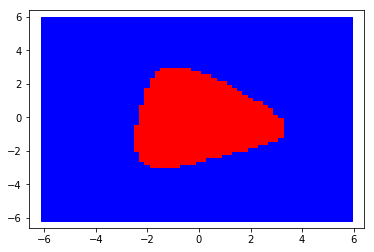

In [53]:
# from NeuralNetwork import NeuralNetwork
import time
import numpy as np
import matplotlib.pyplot as plt


def printBoundary(nn, xStart, xEnd, yStart, yEnd, xi, yi):
    arr = []
    x1 = xStart
    while x1 <= xEnd:
        x2 = yStart
        while x2 <= yEnd:
            arr.append([x1, x2])
            x2 += xi
        x1 += yi
    nn.feedForward(np.array(arr))
    for i in range(len(nn.layer[len(nn.layerN) - 1])):
        if nn.layer[3][i][0] > nn.layer[3][i][1]:
            plt.plot(nn.layer[0][i][0], nn.layer[0][i][1], 'rs')
        else:
            plt.plot(nn.layer[0][i][0], nn.layer[0][i][1], 'bs')
    plt.show()


data = np.genfromtxt('clusterincluster.txt', delimiter=' ')

# input data
x = np.array([[data[i][j] for j in range(2)] for i in range(len(data))])  # np.array(data[:,:2])

# output data
y = np.array([[data[i][2]] for i in range(len(data))])
myDict = makeDict(y)
yOneHot = convertToOneHot(y, myDict)

n = NeuralNetwork([2, 6, 6, 2])
print('Training now!')
start = time.time()
n.train(x, yOneHot, epochs=200, batchSize=100)
end = time.time()
print('Training finished!')
print('Time taken: ', end - start, 's')

# print output layer after training
n.feedForward(x)
# print(n.layer[len(n.layerN) - 1])
print('Accuracy: ', n.getAccuracy(x, y) * 100)
printBoundary(n, -6, 6, -6, 6, 0.2, 0.2)


In [51]:
def makeDict(arr):
    myDict = {}
    counter = 0
    for i in range(len(arr)):
        if not arr[i][0] in myDict.values():
            myDict[counter] = arr[i][0]
            counter += 1
    return myDict

In [44]:
def convertToOneHot(y, myDict):
    oneHot = np.zeros((len(y), len(myDict)))
    for i in range(len(y)):
        myKey = None
        for key, value in myDict.items():
            if value == y[i][0]:
                myKey = key
        oneHot[i][myKey] = 1
    return oneHot

In [52]:
arr = [[1],[2],[2],[1],[4],[3],[2],[3],[2],[1]]
myDict = makeDict(arr)
convertToOneHot(arr, myDict)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.]])